<a href="https://colab.research.google.com/github/SujayVivek/TradingStrategies/blob/main/Stochastic%2BRSI%2BMACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=a5bc5ecc2c170d3c7a3ed92facee017a203ac8746fc627495e0885c75ce0a214
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [4]:
import yfinance as yf
import numpy as np
import ta
from google.colab import files


In [5]:
files.upload()

Saving NIFTY 50-31-12-2021-to-30-12-2022.csv to NIFTY 50-31-12-2021-to-30-12-2022.csv


{'NIFTY 50-31-12-2021-to-30-12-2022.csv': b'\xef\xbb\xbfDate ,Open ,High ,Low ,Close ,Shares Traded ,Turnover (\xe2\x82\xb9 Cr)\n31-DEC-2021,17244.5,17400.8,17238.5,17354.05,167025720,14588.54\n03-JAN-2022,17387.15,17646.65,17383.3,17625.7,200456430,16181.36\n04-JAN-2022,17681.4,17827.6,17593.55,17805.25,247437472,18604.16\n05-JAN-2022,17820.1,17944.7,17748.85,17925.25,251460038,23737.31\n06-JAN-2022,17768.5,17797.95,17655.55,17745.9,236454824,22643.82\n07-JAN-2022,17797.6,17905,17704.55,17812.7,239338015,21447.89\n10-JAN-2022,17913.3,18017.45,17879.15,18003.3,232418075,20853.64\n11-JAN-2022,17997.75,18081.25,17964.4,18055.75,220238796,20781.46\n12-JAN-2022,18170.4,18227.95,18128.8,18212.35,244974287,22298.69\n13-JAN-2022,18257,18272.25,18163.8,18257.8,303700545,28670.93\n14-JAN-2022,18185,18286.95,18119.65,18255.75,229451608,21024.51\n17-JAN-2022,18235.65,18321.55,18228.75,18308.1,266702919,23859.38\n18-JAN-2022,18337.2,18350.95,18085.9,18113.05,227507319,20852.67\n19-JAN-2022,18129.2

In [6]:
import pandas as pd
df = pd.read_csv('NIFTY 50-31-12-2021-to-30-12-2022.csv')



In [8]:
#K-line
df['%K']= ta.momentum.stoch(df['High '], df['Low '], df['Close '], window= 14, smooth_window=3)

#D- line
df['%D']= df['%K'].rolling(3).mean();

In [9]:
#RSI
df['rsi']= ta.momentum.rsi(df['Close '], window = 14)

df['macd']= ta.trend.macd_diff(df['Close '])

In [10]:
df.dropna(inplace= True)

In [26]:
#To check where the lines are crossing and stuff
import pandas as pd

df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),%K,%D,rsi,macd
33,17-FEB-2022,17396.55,17442.90,17235.85,17304.60,232136131,19381.26,50.251282,52.466284,46.783273,-9.106046
34,18-FEB-2022,17236.05,17380.80,17219.20,17276.30,189620888,16126.96,47.378039,49.889165,46.212103,-6.596946
35,21-FEB-2022,17192.25,17351.05,17070.70,17206.65,215183301,18725.57,40.306615,45.978645,44.763600,-8.328107
36,22-FEB-2022,16847.95,17148.55,16843.80,17092.20,300131995,24040.84,29.083891,38.922848,42.411137,-15.466281
37,23-FEB-2022,17194.50,17220.70,17027.85,17063.25,200229631,17662.47,30.561581,33.317362,41.812557,-20.127611
...,...,...,...,...,...,...,...,...,...,...,...
244,26-DEC-2022,17830.40,18084.10,17774.25,18014.60,176652342,13708.21,26.072571,12.650828,40.672826,-95.655330
245,27-DEC-2022,18089.80,18149.25,17967.45,18132.30,214257094,13000.64,38.840375,22.630448,44.800284,-80.947087
246,28-DEC-2022,18084.75,18173.10,18068.35,18122.50,193873167,13997.59,37.777296,34.230081,44.522541,-68.279649
247,29-DEC-2022,18045.70,18229.70,17992.80,18191.00,281052828,18466.05,45.208006,40.608559,46.996084,-52.402850


In [42]:
import pandas as pd

def dettriggers(df, lags, buy=True):
    dfx = pd.DataFrame()
    for i in range(1, lags+1):
        if buy:
            mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
        else:
            mask = (df['%K'].shift(i) > 80) & (df['%D'].shift(i) > 80)
        dfx[f'lag_{i}'] = mask
    return dfx.sum(axis=1)

# Example usage
# Assuming df is your DataFrame containing '%K' and '%D' columns
# triggers = dettriggers(df, lags=3, buy=True)


In [43]:

df['BuyTrigger']= np.where(dettriggers(df,4,),1,0)

In [44]:
df['SellTrigger']= np.where(dettriggers(df,4,False),1,0)

In [49]:
df['Buy']= np.where((df.BuyTrigger) & (df['%K'].between(20,80)) & (df['%D'].between(20,80)) & (df.rsi >50) & (df.macd>0),1,0)

In [50]:
df['Sell']= np.where((df.SellTrigger) & (df['%K'].between(20,80)) & (df['%D'].between(20,80)) & (df.rsi <50) & (df.macd<0),1,0)

In [65]:
#to get buying dates and selling dates
df


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),%K,%D,rsi,macd,BuyTrigger,SellTrigger,Buy,Sell
33,17-FEB-2022,17396.55,17442.90,17235.85,17304.60,232136131,19381.26,50.251282,52.466284,46.783273,-9.106046,0,0,0,0
34,18-FEB-2022,17236.05,17380.80,17219.20,17276.30,189620888,16126.96,47.378039,49.889165,46.212103,-6.596946,0,0,0,0
35,21-FEB-2022,17192.25,17351.05,17070.70,17206.65,215183301,18725.57,40.306615,45.978645,44.763600,-8.328107,0,0,0,0
36,22-FEB-2022,16847.95,17148.55,16843.80,17092.20,300131995,24040.84,29.083891,38.922848,42.411137,-15.466281,0,0,0,0
37,23-FEB-2022,17194.50,17220.70,17027.85,17063.25,200229631,17662.47,30.561581,33.317362,41.812557,-20.127611,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,26-DEC-2022,17830.40,18084.10,17774.25,18014.60,176652342,13708.21,26.072571,12.650828,40.672826,-95.655330,1,0,0,0
245,27-DEC-2022,18089.80,18149.25,17967.45,18132.30,214257094,13000.64,38.840375,22.630448,44.800284,-80.947087,1,0,0,0
246,28-DEC-2022,18084.75,18173.10,18068.35,18122.50,193873167,13997.59,37.777296,34.230081,44.522541,-68.279649,1,0,0,0
247,29-DEC-2022,18045.70,18229.70,17992.80,18191.00,281052828,18466.05,45.208006,40.608559,46.996084,-52.402850,1,0,0,0


In [66]:
Buying_dates, Selling_dates = [], []
for i in range(len(df)-1):
  if df.Buy.iloc[i]:
    Buying_dates.append(df.iloc[i+1]['Date ']) #because we cannot buy on the current day, we must buy on the next day
    for num, j in enumerate(df.Sell[i:]):
      if j:
        Selling_dates.append(df.iloc[i+num + 1]['Date '])
        break;




In [67]:
#to prevent going on buyingg

cutit = len(Buying_dates)- len(Selling_dates)


['15-MAR-2022']

In [68]:
if cutit:
  Buying_dates= Buying_dates[:-cutit]


In [69]:
frame = pd.DataFrame({'Buying_dates': Buying_dates, 'Selling_dates': Selling_dates})

In [70]:
actuals= frame[frame.Buying_dates > frame.Selling_dates.shift(1) ]

In [72]:
def profitcalc():
  Buyprices= df.loc[actuals.Buying_dates]['Open ']
  Sellprices= df.loc[actuals.Selling_dates]['Open ']

  return (Sellprices.values-Buyprices.values)/Buyprices.values

In [73]:
profits= profitcalc()

In [80]:
import matplotlib.pyplot as plt

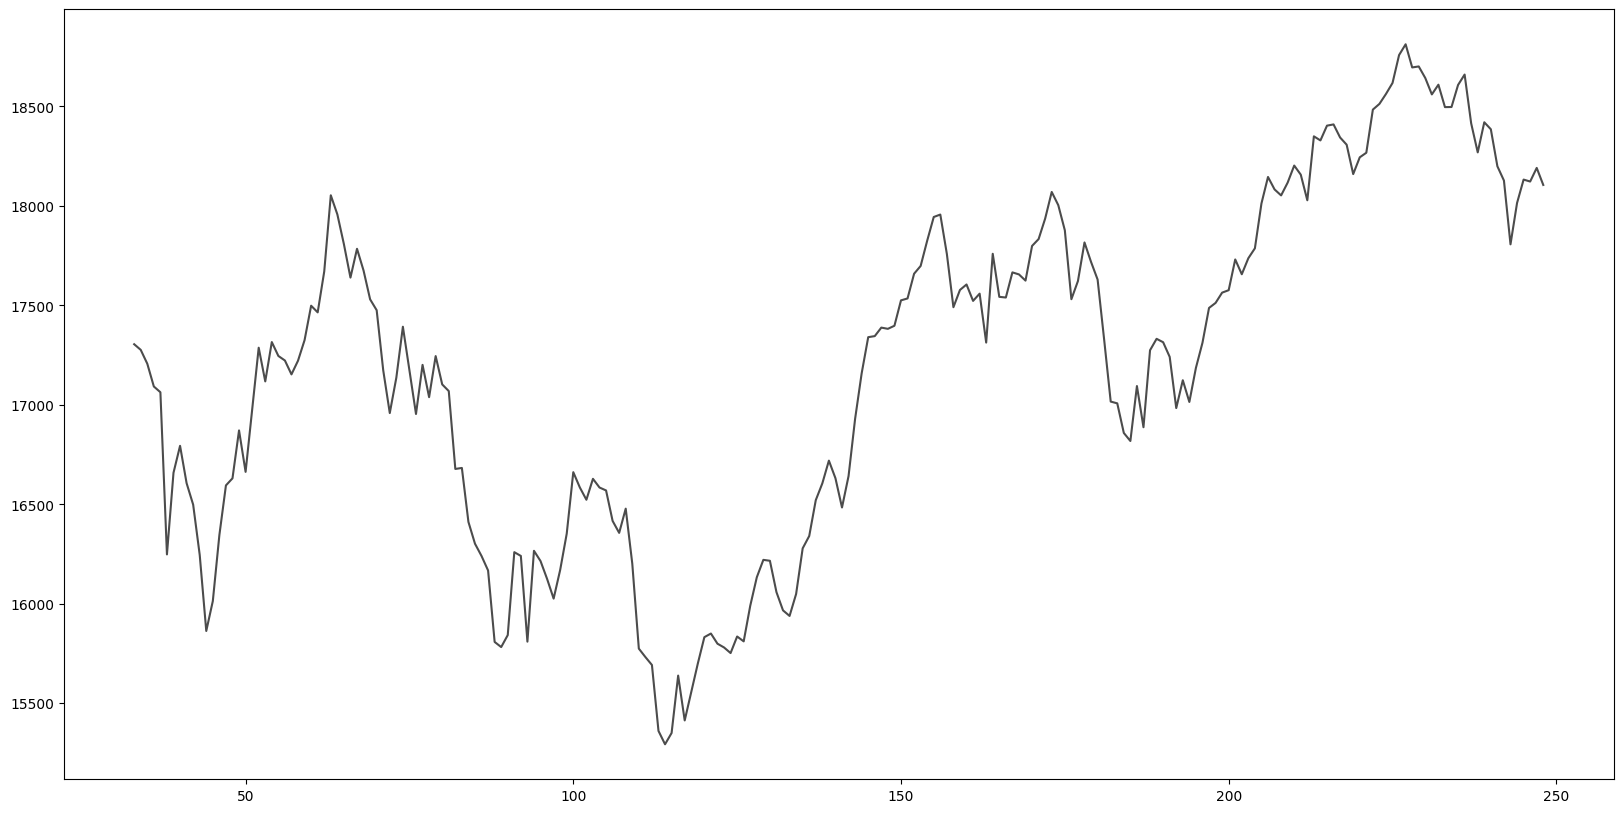

In [84]:

plt.figure(figsize=(20,10))
plt.plot(df['Close '], color= 'k', alpha = 0.7)
plt.scatter(actuals.Buying_dates, df['Open '][actuals.Buying_dates], marker= '^', color= 'g', s = 500)
plt.scatter(actuals.Selling_dates, df['Open '][actuals.Selling_dates], marker= 'v', color= 'r', s = 500)